# **PyTorch Neural Network Classification**
## 1. Architecture of a classification neural network
> note: check the ```classification_note.md``` to check the overall architecture description of neural neural network

## 2. Make classification data and get it ready
Here, we can use make_circles() method from scikit-learn to generate two circles with different colored dots

In [1]:
from sklearn.datasets import make_circles

# make 2000 samples
n = 3000

# create circles
X, y = make_circles(n, noise=0.3, # a little bit of noise to the dots 
                    random_state=42) # keep random state with fix sample

In [2]:
# let's view the first 5 x and y values
print(f"First 6 X features: \n{X[:5]}")
print(f"First 5 y values: \n{y[:5]}")

First 6 X features: 
[[-0.15007518  0.58809749]
 [-0.01663532 -1.05424758]
 [ 0.58472714  0.66332259]
 [ 0.38307277  0.86319256]
 [-0.50709044 -0.72126271]]
First 5 y values: 
[1 0 1 0 1]


In [3]:
# Make a Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,-0.150075,0.588097,1
1,-0.016635,-1.054248,0
2,0.584727,0.663323,1
3,0.383073,0.863193,0
4,-0.507090,-0.721263,1


In [4]:
circles.head(10)

,X1,X2,label
0,-0.150075,0.588097,1
1,-0.016635,-1.054248,0
2,0.584727,0.663323,1
3,0.383073,0.863193,0
4,-0.507090,-0.721263,1
5,0.128757,-0.734013,0
6,1.232274,0.252829,0
7,-0.501040,1.104649,1
8,-0.370735,1.617847,0
9,-0.267308,-0.869801,1


In [5]:
# check different labels
circles.label.value_counts()

1    1500
0    1500
Name: label, dtype: int64

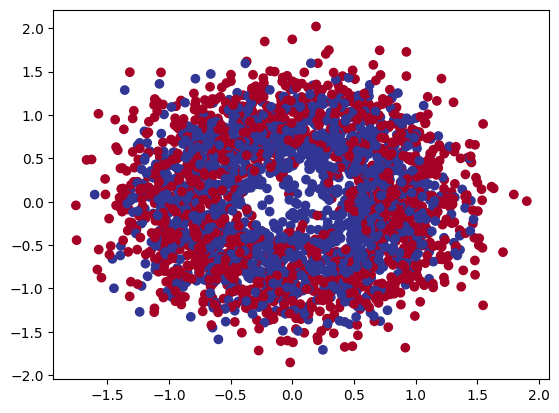

In [6]:
# let's plot the circles

import matplotlib.pyplot as plt
#matplotlib_inline
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#### 1.1 Input and output shape

In [7]:
# check the shape of our features and labels
X.shape, y.shape

((3000, 2), (3000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for on sample of X: {X_sample} and the same for y: {y_sample}")
print(f"shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for on sample of X: [-0.15007518  0.58809749] and the same for y: 1
shape for one sample of X: (2,) and the same for y: ()


#### 1.2 Turn data into tensors and create train and test splits

In [9]:
# Turn data into tensors
# otherwise this cause issues with computations later on

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# view the first five samples
X[:5], y[:5]

(tensor([[-0.1501,  0.5881],
         [-0.0166, -1.0542],
         [ 0.5847,  0.6633],
         [ 0.3831,  0.8632],
         [-0.5071, -0.7213]]),
 tensor([1., 0., 1., 0., 1.]))

In [10]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [11]:
# check the status
print(len(X_train), len(X_test), len(y_train), len(y_test))

2400 600 2400 600


## 3. Build Model

In [12]:
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input shape
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes 2 features, produce 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes 5 features, produce 1 feature
    # 3. Define a forward method containing the forword pass computations
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        self.layer_2(self.layer_1(x))

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
# Make prediction with the model
untrained_preds = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\nLength of 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels: \n{y_test[:10]}")

Length of predictions: 600, shape: torch.Size([600, 1])
Length of test samples: 600, shape: torch.Size([600])

Length of 10 predictions: 
tensor([[-0.2432],
        [-0.1001],
        [-0.4202],
        [-0.5470],
        [-0.1064],
        [-0.4230],
        [-0.2558],
        [-0.4977],
        [-0.0924],
        [-0.5214]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels: 
tensor([1., 1., 1., 0., 0., 1., 0., 1., 0., 1.])


#### 3.1 Setup loss function and optimizer¶

In [16]:
# create a loss function
# loss_fn = nn.BCELoss() no sigmoid built-in

loss_fn = nn.BCEWithLogitsLoss() # sigmoid built-in

# create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [17]:
# Model evaluation matrics and accuracy 
# calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item() # torch.eq() calculate where two tensor a equal
    acc = (correct / len(y_preds)) * 100
    return acc

## 4. Train model
#### 4.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [18]:
# view the first 4 outputs of the forward pass on the test data
y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[-0.2432],
        [-0.1001],
        [-0.4202],
        [-0.5470],
        [-0.1064]], device='cuda:0', grad_fn=<SliceBackward0>)

In [19]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4395],
        [0.4750],
        [0.3965],
        [0.3666],
        [0.4734]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [20]:
# Find the predicted labels (round the prediction prpbabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# git rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [21]:
y_test[:5]

tensor([1., 1., 1., 0., 0.])

#### 4.2 Building a training and testing loop

In [22]:
torch.manual_seed(42)

# set the number of epochs
epochs = 100


# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the training and evaluation loop
for epoch in range(epochs):
    ### Trainig
    model_1.train()

    # 1. Forward pass (model output raw logits)
    y_logits = model_1(X_train).squeeze() # squeeze to remove extra `1`
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits to prediction

    # 2. Calculate the loss function
    loss = loss_fn(y_logits, # usnig nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_preds=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. optimizer step
    optimizer.step()


    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calcualate loss/accuarcy
        test_loss = loss_fn(test_logits, test_pred)
        test_acc = accuracy_fn(y_true=y_test, y_preds=test_pred)

    
    # print out what's happening every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.2f}% |")

Epoch: 0 | Loss: 0.71597, Accuracy: 48.38% | Test Loss: 0.544, Test Accuracy: 52.50% |
Epoch: 10 | Loss: 0.70158, Accuracy: 46.96% | Test Loss: 0.602, Test Accuracy: 47.33% |
Epoch: 20 | Loss: 0.69653, Accuracy: 48.33% | Test Loss: 0.624, Test Accuracy: 47.33% |
Epoch: 30 | Loss: 0.69457, Accuracy: 49.38% | Test Loss: 0.634, Test Accuracy: 48.67% |
Epoch: 40 | Loss: 0.69369, Accuracy: 50.42% | Test Loss: 0.640, Test Accuracy: 50.33% |
Epoch: 50 | Loss: 0.69322, Accuracy: 50.54% | Test Loss: 0.644, Test Accuracy: 49.50% |
Epoch: 60 | Loss: 0.69295, Accuracy: 50.92% | Test Loss: 0.648, Test Accuracy: 48.83% |
Epoch: 70 | Loss: 0.69277, Accuracy: 51.58% | Test Loss: 0.650, Test Accuracy: 49.33% |
Epoch: 80 | Loss: 0.69264, Accuracy: 52.21% | Test Loss: 0.653, Test Accuracy: 49.33% |
Epoch: 90 | Loss: 0.69255, Accuracy: 52.71% | Test Loss: 0.654, Test Accuracy: 49.33% |


In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn pyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

In [29]:
# import different funciton to plto the visualize the mdoel
from helper_functions import plot_predictions, plot_decision_boundary

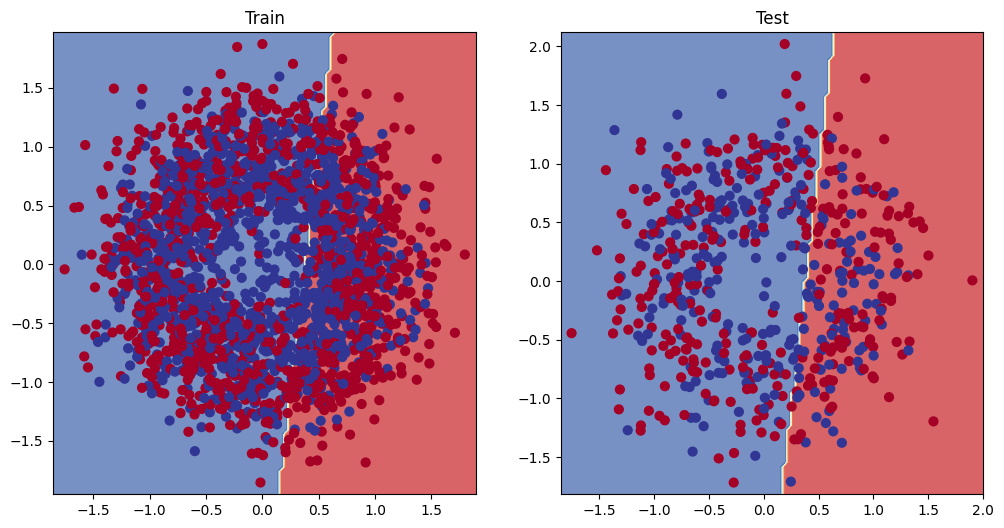

In [30]:
# Plot decision boundaries for train and test set
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(122)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

The model goes upon the underfiting, meaning it's not learning predictive patterns from the data.
- So, How could we imporve this? 

## 5. Improving a model (from a model perspective)
Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.